In [26]:
%matplotlib inline
import numpy as np
import scipy.optimize as optimization
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib
import arviz as az
import theano
import ODE_models
import pandas as pd
import scipy.integrate as integrate
from scipy.integrate import quad
plt.style.use('seaborn-darkgrid')

In [3]:
#Read Data Files
r_newyorkTSV = '../../newyork.tsv'
w_newyorkTSV = '../../newyork.tsv'
tsv_readny = pd.read_csv("newyork.tsv", sep='\t')
cumulativeny = tsv_readny['confirmed'] #is this what I want?

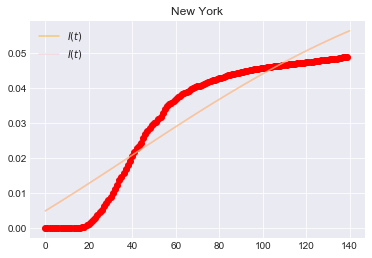

In [4]:
#Plot the data and the model output

params = ODE_models.get_params(beta_S=0.07641291, beta_A= 0.45767813, gamma= 0.2201679,nu=0.10223429, rho=2.0525167, q=  0.35182442,p= 0.60957564)
## Set initial conditions
Nny= 8.399e6
yobsny = cumulativeny/Nny
#Sn_0ny  = 1-(0.005+yobsny[0])
#Sa_0  = 0.005
#IS_0ny  = yobsny[0]
Sn_0ny = .99
Sa_0  =  .005
IS_0ny  = .005
IAn_0 = 0
IAa_0 = 0
RS_0  = 0
RAn_0 = 0
RAa_0 = 0
M_0   = 0.01

#newyork
initial_stateny = np.array([Sn_0ny,Sa_0,IS_0ny,IAn_0,IAa_0,RS_0,RAn_0,RAa_0,M_0])
timeny = np.arange(0,140,.001)
timeobsny = np.arange(0,140,1)
sim_systemny = odeint(ODE_models.SIRan_system, initial_stateny, timeny, args=(params,))



yny =1-(sim_systemny[:,0]+sim_systemny[:,1])

ypred = np.zeros(140)
for i in range(0,140):
    ind = np.where(timeny ==i)
    ypred[i] = yny[ind]


plt.plot(timeobsny,yobsny, color= 'red',marker='o', linestyle='none')
plt.plot(timeny, yny, color='orange', alpha=0.5, label=f'$I(t)$')
plt.plot(timeobsny, ypred, color='pink', alpha=0.5, label=f'$I(t)$')
plt.legend()
plt.title('New York')
plt.show()

In [29]:
#This is where the least squares is claculated for New York
def SEfunc(params, xi, dealthdelt, gamma,p):
    nu=params[3]
    m = params[4]
    beta_S=params[0]
    beta_A = params[1]
    q= params[2]
    rho = params[5]
    mu = params[6]
    Sa_0 = params[7]
    IS_0ny= params[8]
    yobsny = np.array(cumulativeny/Nny)
    Sn_0ny = 1-(Sa_0+IS_0ny)
    IAn_0 = 0
    IAa_0 = 0
    RS_0  = 0
    RAn_0 = 0
    RAa_0 = 0
    M_0   = 0.01
    xi=(1/3)
    dealthdelt=0.02
    gamma=(1/2.8)
    p =2/3
    
    og_params = ODE_models.get_params(beta_S=beta_S, beta_A= beta_A, q = q,nu = nu, m=m,rho=rho,mu=mu, xi= xi, dealthdelt= dealthdelt, gamma=gamma, p=p)

   
    initial_stateny = np.array([Sn_0ny,Sa_0,IS_0ny,IAn_0,IAa_0,RS_0,RAn_0,RAa_0,M_0])
    timeny = np.arange(0,140,.001)
    timeobsny = np.arange(0,140,1)
    sim_systemny = odeint(ODE_models.SIRan_system, initial_stateny, timeny, args=(og_params,))
    yny =1-(sim_systemny[:,0]+sim_systemny[:,1])
    
    ypred = np.zeros(140)
    for i in range(0,140):
        ind = np.where(timeny ==i)
        ypred[i] = yny[ind]
    
    SE = (ypred-yobsny)**2
    sumSE = sum(SE)
    return(sumSE)




In [ ]:
import random as random
sims = int(1e2)
ls = []
for i in range(0,sims):
    starting_points = np.zeros(9) #Beta_s, beta_a, q, nu, m, rho, mu, S-a(0), I_s(0)
    starting_points[0] = random.randint(0,1)
    starting_points[1] = random.randint(0,1)
    starting_points[2] = random.randint(0,1)
    starting_points[3] = random.randint(0,1)
    starting_points[4] = random.randint(0,1)
    starting_points[5] = random.randint(0,1)
    starting_points[6] = random.randint(0,100)
    starting_points[7] = random.randint(0,1)
    starting_points[8] = random.randint(0,1)
    least_sq = SEfunc(starting_points, xi = 1/3, dealthdelt= 0.02, gamma=1/2.8, p =2/3)
    print(least_sq)
    ls.append(least_sq)
    
    
    


In [ ]:
print(ls)